<font size = 6>The __Heat Equation__ in one dimension with homogeneous dirichlet boundary conditions is given by the PDE:<font> <br>

$
u_t = ku_{xx}, \quad 0\leq x \leq L, \  0\leq t \leq T
$

where $k$ is the thermal diffusitivity constant

with initial condition:
$
u(x,0) = \phi(x), \quad 0\leq x \leq L
$

and with homogeneous dirichlet boundary conditions:

$
u(0,t) = u(L,t) = 0
$

the numerical solution is:

$
u^{n+1}_j = s(u^n_{j-1} + u^n_{j+1}) + (1-2s)u^n_j
$

where $n$ is the time step, $j$ is the distance step and the mesh factor:

$
s = k\Delta t / \Delta x^2
$

where $s$ has the condition:

$
s \leq \frac{1}{2} \ 
$
for stability

<font size = 5>__Imports__<font>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

<font size = 5>__Initialization__<font>

In [45]:
x0, xL = 0, 10 #start and ending distance
t0, tL = 0, 3 #start and ending times
dx = .01 #displacement
k = 1 #thermal constant
dt = (.5*(dx)**2)/k #for stability

x = np.arange(x0, xL+dx, dx).round(3) #distance array
t = np.arange(t0, tL+dt, dt).round(3) #time array

u = np.zeros((len(x), len(t))) #solution matrix

#mesh factor
s = k*dt/(dx**2)  

#initial condition
phi = -x**2 +10*x+10
u[:,0] = phi

#boundary conditions
homoDirichlet = [0, 0]
u[0,:] = homoDirichlet[0]
u[-1,:] = homoDirichlet[-1]

<font size = 5>__Solution__<font>

In [46]:
#looping through to calculate solution
for n in range(len(t)-1):
    for j in range(1, len(x)-1):
        u[j, n+1] = s*(u[j+1, n] + u[j-1, n]) + (1-2*s)*u[j,n]

<font size = 5>__Visualization__<font>

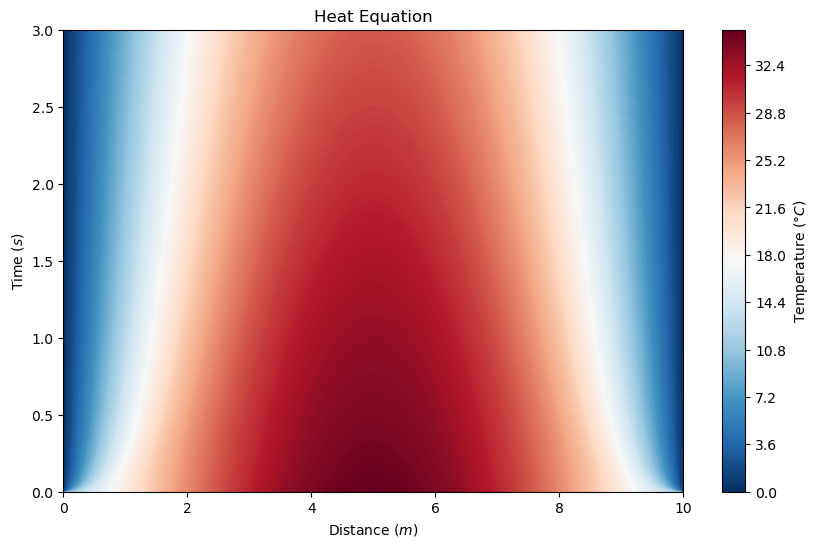

In [47]:
#points for plotting
X,T = np.meshgrid(x,t)

plt.figure(figsize=(10, 6))
cp = plt.contourf(X, T, np.transpose(u), levels=250, cmap='RdBu_r')
plt.colorbar(cp, label='Temperature ($\degree C$)')
plt.ylabel('Time $(s)$')
plt.xlabel('Distance $(m)$')
plt.title('Heat Equation')
plt.show()